# Student Analsis


In this notebook I present to you data taken out of a real highschool. In this dataset we have a total of 16 variables and a single class. Most of the data is categorical, this means it is divided into a certain ammount of pre-defined categories. There also a few columns that have numerical data in the form of integers. In this notebook we will try to extract some key features in order to better understand the dataset and as part of the field of 'Data Analysis'.

## Step 0: 
### Load the data into a pandas dataframe

How do you intend to do data analysis without loading the data????
# ?

In [74]:
import pandas as pd
df = pd.read_csv("students.csv")

## Step 1: 
### Print some elements from the dataset in order to take a quick look at the dataset

Understanding the data you are working with is very important

In [75]:
# Print 10 e random elements from the dataset.
df.sample(10)

,gender,NationalITy,PlaceofBirth,StageID,GradeID,SectionID,Topic,Semester,Relation,raisedhands,VisITedResources,AnnouncementsView,Discussion,ParentAnsweringSurvey,ParentschoolSatisfaction,StudentAbsenceDays,Class
285,M,Jordan,Jordan,MiddleSchool,G-06,A,English,S,Father,41,39,35,39,Yes,Bad,Above-7,M
405,F,Syria,Syria,MiddleSchool,G-07,A,Biology,S,Mum,80,91,87,72,Yes,Good,Under-7,H
133,M,KW,KuwaIT,lowerlevel,G-02,A,IT,S,Father,12,60,0,70,Yes,Good,Above-7,L
455,F,Jordan,Jordan,MiddleSchool,G-08,A,History,S,Father,39,88,43,72,Yes,Good,Under-7,M
75,M,Jordan,Jordan,MiddleSchool,G-07,A,Quran,F,Mum,50,90,29,60,Yes,Good,Under-7,M
275,F,lebanon,lebanon,MiddleSchool,G-06,A,English,S,Mum,90,62,80,60,Yes,Good,Under-7,H
456,F,Jordan,Jordan,MiddleSchool,G-08,A,Chemistry,F,Father,85,90,52,30,Yes,Good,Under-7,H
91,M,KW,KuwaIT,lowerlevel,G-02,B,IT,F,Father,80,90,55,19,Yes,Good,Under-7,H
184,M,lebanon,lebanon,MiddleSchool,G-08,A,Arabic,S,Mum,10,35,30,13,No,Bad,Above-7,L
76,M,Iran,Iran,HighSchool,G-09,A,IT,F,Mum,15,70,37,44,Yes,Good,Under-7,M


## Step 2:
### Check for missing or null values

We should always check for missing values as part of getting familiarized with our data.


In [76]:
# check for null values
df.isnull().sum()

gender                      0
NationalITy                 0
PlaceofBirth                0
StageID                     0
GradeID                     0
SectionID                   0
Topic                       0
Semester                    0
Relation                    0
raisedhands                 0
VisITedResources            0
AnnouncementsView           0
Discussion                  0
ParentAnsweringSurvey       0
ParentschoolSatisfaction    0
StudentAbsenceDays          0
Class                       0
dtype: int64

## Step 3:
### which is the column with the highest ammount of VARIABILITY?

Time to start extracting info.


In [77]:
# Check every column EXCEPT the one for the class and find out which one has the highest variability
for col in df.columns:
   if type(df[col].values[0]) == str:
       values = df[col].unique()
       res = dict()
       for i, ele in enumerate(values):
           res[ele] =  i
       #print(res) 
       df = df.replace({col: res})
       #print(df[col])

df_std = df.std().to_frame()
df_std = df_std.sort_values(by=df_std.columns[0])

## Step 4:
### Find out for each variable their skewness and plot 5 of them.

Understanding the biases of data can always give us some key information


['gender' 'ParentschoolSatisfaction' 'StudentAbsenceDays' 'Relation'
 'ParentAnsweringSurvey']


array([[<AxesSubplot:title={'center':'gender'}>,
        <AxesSubplot:title={'center':'ParentschoolSatisfaction'}>],
       [<AxesSubplot:title={'center':'StudentAbsenceDays'}>,
        <AxesSubplot:title={'center':'Relation'}>],
       [<AxesSubplot:title={'center':'ParentAnsweringSurvey'}>,
        <AxesSubplot:>]], dtype=object)

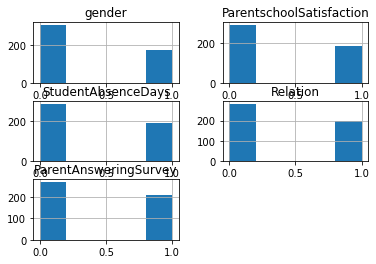

In [78]:
# Select 5 columns and find out their bias
df_slew = df.skew()
names = df_std.index.values[:5]
print(names)


df[names].hist(bins=5)


## Step 5:
### Find out for all the variables which is their correlation with the class

Sometimes we need to reduce the ammount of features we feed the model in order to make it more lighweight, so we either select the best ones or take out the most useless ones.

In [116]:
# Select the top 4 most correlated and put them in a different dataset
cols = df.columns

correlations = {}

for col in cols:
    correlations[col] = df[col].corr(df['Class'])


correlations = pd.DataFrame( list(correlations.items()), columns = ['col','cor'])

correlations = correlations.sort_values(by='cor', ascending = False)[:5]
print(correlations)


                  col       cor
16              Class  1.000000
8            Relation  0.272111
9         raisedhands  0.231016
10   VisITedResources  0.161748
11  AnnouncementsView  0.143996


In [117]:
# Select the top 4 least correlated and create a new dataset without them
df_new = df[correlations['col'].values]
df_new

,Class,Relation,raisedhands,VisITedResources,AnnouncementsView
0,0,0,15,16,2
1,0,0,20,20,3
2,1,0,10,7,0
3,1,0,30,25,5
4,0,0,40,50,12
...,...,...,...,...,...
475,1,0,5,4,5
476,0,0,50,77,14
477,0,0,55,74,25
478,1,0,30,17,14


## Step 6:
### Visualize the correlation between the previously selected 4 most correlated variables with the class

Lets see if those are correlated too.


In [118]:
# Plot the correlation among themself for the previous 4 variables.
'''
import numpy as np
corrs = df_new.corr()

best = np.zeros(5)

for i in range(corrs.shape[0]):
    for j in range(i):
        if j != i:
            if corrs.values[i][j] > min(best):
                best[best.argmin()] = corrs.values[i][j]
print(best)
'''
corrs = df_new.corr()
corrs



,Class,Relation,raisedhands,VisITedResources,AnnouncementsView
Class,1.000000,0.272111,0.231016,0.161748,0.143996
Relation,0.272111,1.000000,0.364237,0.360240,0.339505
raisedhands,0.231016,0.364237,1.000000,0.691572,0.643918
VisITedResources,0.161748,0.360240,0.691572,1.000000,0.594500
AnnouncementsView,0.143996,0.339505,0.643918,0.594500,1.000000


## Step 7:
### For the previoys 4 variables plot them AGAINST the class


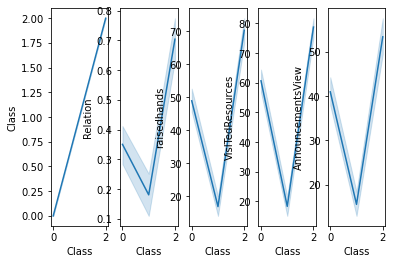

In [142]:
# make 4 plot where you plot each of the variables with the class
import seaborn as sns
import matplotlib.pyplot as plt

plots = []

fig, axs = plt.subplots(ncols=5)
for i, col in enumerate(df_new.columns):
    plt = sns.lineplot(data=df_new, x="Class", y=col, ax=axs[i])



## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as L

In [152]:
# compute the probability
df = pd.read_csv("students.csv")

total_cases = df.shape[0]
absents = df.loc[df['StudentAbsenceDays'] == 'Under-7']
absent_cases_L = absents.loc[df['Class'] == 'L'].shape[0]
p_a_l = absent_cases_L/total_cases
print(p_a_l)


0.022916666666666665


## Step 8:
### Probability time, if I know a student had less than 7 absent days what is the probability of him being classified as m or higher, using the previous calculation

In [153]:
# Looking at step seven extrapolate from it the probability of a student being classified as M or H

print(1 - p_a_l)

0.9770833333333333


## Step 9:
### Probability time, knowing a student was classified as H, what is the probability of him having raised the hand more than 10 times

In [161]:
# Bayes time
raises = df.loc[df['raisedhands'] > 10]
r = raises.shape[0]
h = df.loc[df['Class'] == 'H'].shape[0]
h_r = raises.loc[raises['Class'] == 'H'].shape[0]



p = ( (h_r/r) * r ) / h
p


0.9929577464788732

## Step 10:
### Free time, if I was the principal of the school what plots and probabilities would you show me to help me accept only M and H students.